In [88]:
# ##### %pip install pytorch_tabnet
# !pip install tensorflow
# %pip install optuna
# ##!pip install --upgrade tensorflow
# # !pip install scikeras
# #

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [86]:
# ##!pip install imbalanced-learn
# ##!pip install  SMOTE
# %pip install -U scikit-learn imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def data_preprocess(df):
    # One-hot encoding for the 'cancer_type' target variable
    y = pd.get_dummies(df['cancer_type'], prefix='cancer_type')
    df = df.drop('cancer_type', axis=1)

    # Assume all other categorical data has been appropriately handled and included in df

    # Scaling numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Convert the one-hot encoded y DataFrame to a single column with integer labels
    y = np.argmax(y.values, axis=1)

    return df, y

# Load data
df = pd.read_csv('dataset.csv')

# Preprocess data
X, y = data_preprocess(df)

# Calculate class weights (for one-dimensional integer-encoded y)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Class weights:", class_weights_dict)


Class weights: {0: 0.30793060718711274, 1: 3.358108108108108, 2: 22.59090909090909, 3: 2.4362745098039214}


In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.utils.class_weight import compute_class_weight
# from imblearn.over_sampling import SMOTE  # Import SMOTE

# def data_preprocess(df):
#     # One-hot encoding for the 'cancer_type' target variable
#     y = pd.get_dummies(df['cancer_type'], prefix='cancer_type')
#     df = df.drop('cancer_type', axis=1)

#     # Assume all other categorical data has been appropriately handled and included in df

#     # Scaling numeric columns
#     numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#     scaler = MinMaxScaler()
#     df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#     # Convert the one-hot encoded y DataFrame to a single column with integer labels
#     y = np.argmax(y.values, axis=1)

#     return df, y

# # Load data
# df = pd.read_csv('dataset.csv')

# # Preprocess data
# X, y = data_preprocess(df)

# # Splitting data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Applying SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)  # Configure SMOTE
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Calculate class weights (for the resampled y_train_smote)
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_smote), y=y_train_smote)
# class_weights_dict = dict(enumerate(class_weights))

# print("Class weights after SMOTE:", class_weights_dict)

# # You can now proceed to use X_train_smote and y_train_smote for training your model


Class weights after SMOTE: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 32)                  │          22,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,332 (91.14 KB)

 Trainable params: 23,332 (91.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3646 - loss: 2.6926 - val_accuracy: 0.0000e+00 - val_loss: 2.9680
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 1.4803 - val_accuracy: 0.0000e+00 - val_loss: 2.7386
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6490 - loss: 1.1760 - val_accuracy: 0.0000e+00 - val_loss: 2.7632
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6937 - loss: 1.0527 - val_accuracy: 0.0000e+00 - val_loss: 2.6520
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7225 - loss: 0.9922 - val_accuracy: 0.0000e+00 - val_loss: 2.7123
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7255 - loss: 0.9618 - val_accuracy: 0.0000e+00 - val_loss: 2.7361
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7386 - loss: 0.9557 - val_accuracy: 0.0000e+00 - val_loss: 2.6259
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7517 - los

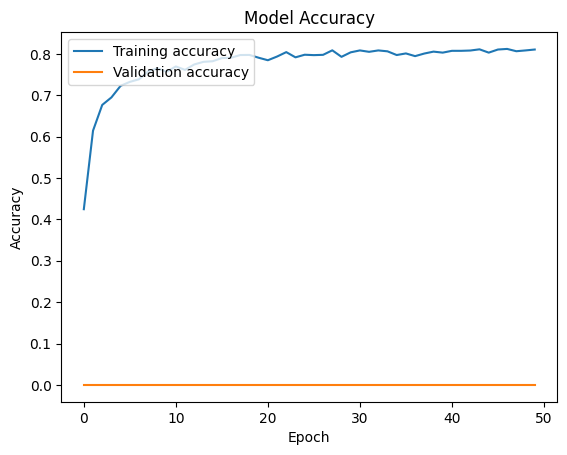

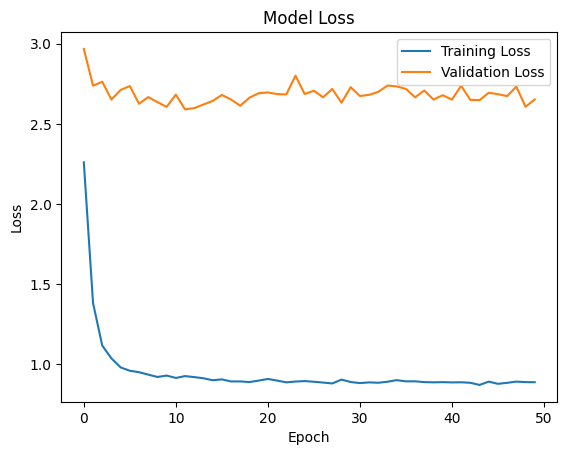

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 1.0387  
Test Accuracy: 74.37%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


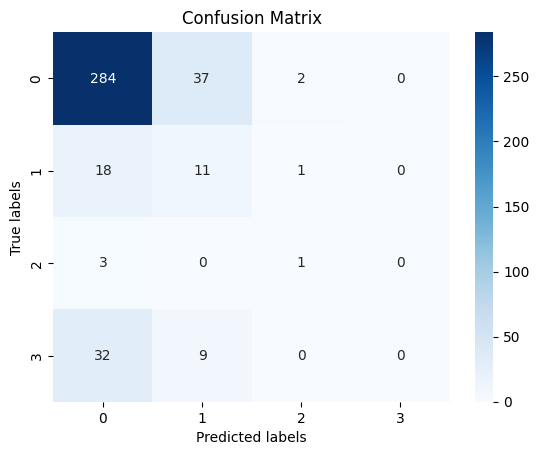

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       323
           1       0.19      0.37      0.25        30
           2       0.25      0.25      0.25         4
           3       0.00      0.00      0.00        41

    accuracy                           0.74       398
   macro avg       0.32      0.37      0.34       398
weighted avg       0.70      0.74      0.72       398



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.regularizers import l2
# import numpy as np

# # Number of unique classes
# X_train_smote = np.nan_to_num(X_train_smote).astype(np.float32)
# y_train_smote = np.nan_to_num(y_train_smote).astype(np.float32)
# num_classes = len(np.unique(y_train_smote))  # Use resampled y_train to determine the number of classes

# # Define the model architecture
# model = Sequential([
#     Dense(32, activation='relu', kernel_regularizer=l2(0.02), input_shape=(X_train_smote.shape[1],)),
#     Dropout(0.3),
#     Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
#     Dropout(0.3),
#     Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.02))
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # Appropriate for integer labels
#               metrics=['accuracy'])

# # Print model summary to check the architecture
# model.summary()

# # Ensure no NaN values in the training dataset
# X_train_smote = np.nan_to_num(X_train_smote)
# y_train_smote = np.nan_to_num(y_train_smote)

# # Fitting the model with resampled data
# history = model.fit(
#     X_train_smote, y_train_smote,
#     epochs=50,
#     batch_size=32,
#     validation_split=0.2,  # Ensure you have enough data to do this split
#     class_weight=class_weights_dict,  # Using the class weights calculated from the resampled data
#     verbose=1
# )

# # Plot accuracy and loss
# import matplotlib.pyplot as plt

# # Accuracy plot
# plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

# # Loss plot
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

# # Evaluate the model using the original test set
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
# print(f"Test Accuracy: {test_acc * 100:.2f}%")

# # Predict the test set results
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Generate and display the confusion matrix
# from sklearn.metrics import confusion_matrix, classification_report
# cm = confusion_matrix(y_test, y_pred_classes)
# sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

# # Print the classification report
# print("Classification Report:\n", classification_report(y_test, y_pred_classes))


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import numpy as np  # Make sure to import numpy

# Assuming you have your training data loaded into X_train and y_train
# Number of unique classes
num_classes = len(np.unique(y_train))  # Adjusted to find the number of unique classes directly

model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.02), input_shape=(X_train.shape[1],)),
    Dropout(0.13),
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.13),
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.02))
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Make sure this matches your label format
              metrics=['accuracy'])

# Print model summary to check the architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_338 (Dense)                    │ (None, 32)                  │          22,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_225 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_339 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_226 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_340 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,332 (91.14 KB)

 Trainable params: 23,332 (91.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1311 - loss: 3.2334 - val_accuracy: 0.1604 - val_loss: 2.6126
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2604 - loss: 2.4948 - val_accuracy: 0.3113 - val_loss: 2.1913
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3961 - loss: 2.0866 - val_accuracy: 0.0031 - val_loss: 2.1641
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1515 - loss: 2.0849 - val_accuracy: 0.7830 - val_loss: 1.7358
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5445 - loss: 2.0682 - val_accuracy: 0.7830 - val_loss: 1.5791
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4894 - loss: 1.7430 - val_accuracy: 0.7201 - val_loss: 1.5467
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 1.4704 - val_accuracy: 0.3302 - val_loss: 1.6133
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3545 - loss: 1.6032 - val_accuracy: 0.7799 - val_loss:

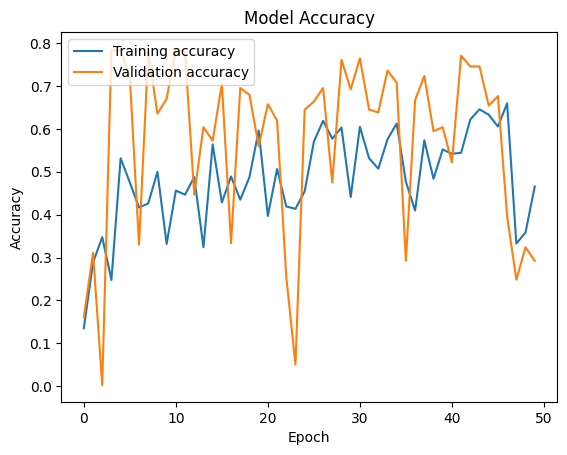

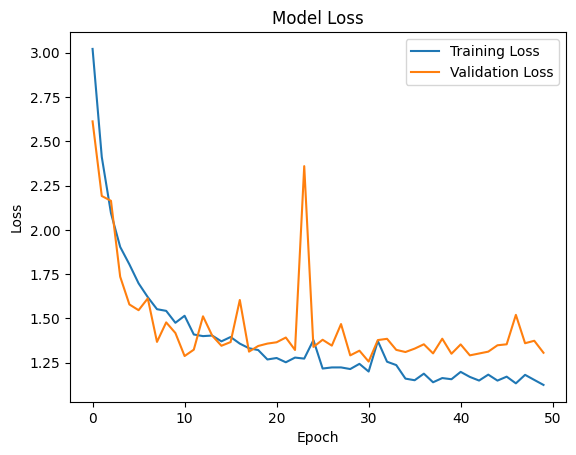

In [35]:
import numpy as np

# Check for any remaining NaN values in the dataset
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    X_train = np.nan_to_num(X_train)
    y_train = np.nan_to_num(y_train)

# Fitting the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    verbose=1
)

# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 1.3060 
Test Accuracy: 31.16%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


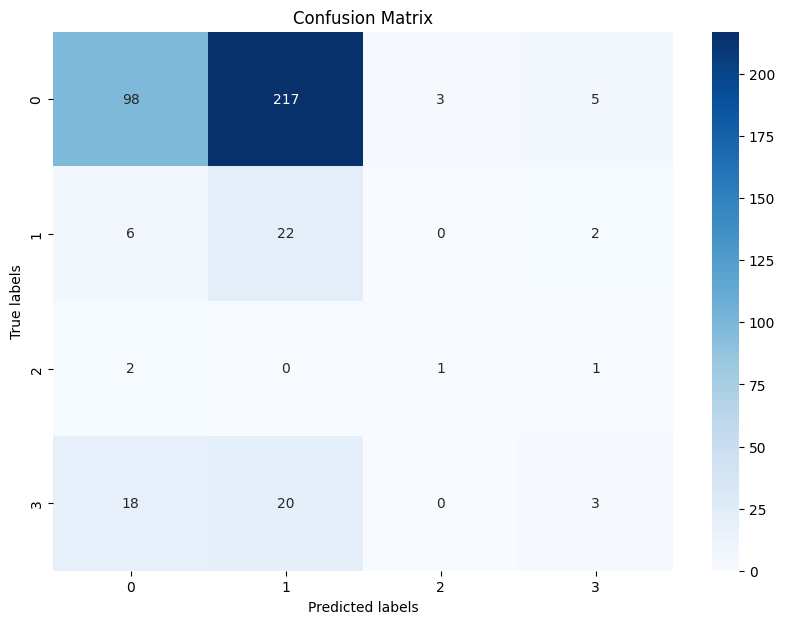

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.30      0.44       323
           1       0.08      0.73      0.15        30
           2       0.25      0.25      0.25         4
           3       0.27      0.07      0.12        41

    accuracy                           0.31       398
   macro avg       0.35      0.34      0.24       398
weighted avg       0.68      0.31      0.38       398



In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model
try:
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

    # Predict the test set results
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred_classes))

except ValueError as e:
    print("ValueError during model evaluation:", e)


In [37]:
import numpy as np
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

def create_model(trial):
    # Hyperparameters to tune
    optimizer_options = ['adam', 'sgd']
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    neurons = trial.suggest_categorical('neurons', [32, 64, 128])
    lr = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    n_layers = trial.suggest_int('n_layers', 1, 5)  # Number of hidden layers to add

    model = Sequential([Input(shape=(X_train.shape[1],))])

    for _ in range(n_layers):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile model with dynamic optimizer
    optimizer = trial.suggest_categorical('optimizer', optimizer_options)
    if optimizer == 'adam':
        opt = Adam(learning_rate=lr)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=lr)

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

def objective(trial):
    model = create_model(trial)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=trial.suggest_categorical('batch_size', [32, 64, 128]),
        verbose=0,
        validation_split=0.1,
        callbacks=[early_stopping]
    )

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Assuming X_train, X_test, y_train, y_test, num_classes are pre-defined

# Create a study object
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Output the best trial
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-05-02 19:32:56,371] A new study created in memory with name: no-name-8bce90e8-9689-455d-916a-9fe6ffb8eab3
[I 2024-05-02 19:33:05,360] Trial 0 finished with value: 0.8140703439712524 and parameters: {'dropout_rate': 0.12864185405844544, 'neurons': 128, 'learning_rate': 0.05760086294986737, 'n_layers': 1, 'optimizer': 'sgd', 'batch_size': 64}. Best is trial 0 with value: 0.8140703439712524.
[I 2024-05-02 19:33:19,887] Trial 1 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.15767961827738686, 'neurons': 64, 'learning_rate': 0.00016432090747929716, 'n_layers': 5, 'optimizer': 'sgd', 'batch_size': 128}. Best is trial 0 with value: 0.8140703439712524.
[I 2024-05-02 19:33:30,497] Trial 2 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.4716230358208241, 'neurons': 32, 'learning_rate': 0.0003010727048194665, 'n_layers': 3, 'optimizer': 'adam', 'batch_size': 32}. Best is trial 0 with value: 0.8140703439712524.
[I 2024-05-02 19:33:46,0

KeyboardInterrupt: 

In [25]:
import numpy as np
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

def create_model(trial):
    # Hyperparameters to tune
    optimizer_options = ['adam', 'sgd']
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    neurons = trial.suggest_categorical('neurons', [32, 64, 128])
    lr = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)

    # Model definition using an Input layer
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    # Compile model with dynamic optimizer
    optimizer = trial.suggest_categorical('optimizer', optimizer_options)
    if optimizer == 'adam':
        opt = Adam(learning_rate=lr)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=lr)

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

def objective(trial):
    model = create_model(trial)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=trial.suggest_categorical('batch_size', [32, 64, 128]),
        verbose=0,
        validation_split=0.1,
        callbacks=[early_stopping]
    )

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Assuming X_train, X_test, y_train, y_test, num_classes are pre-defined

# Create a study object
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Output the best trial
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-05-02 18:49:57,147] A new study created in memory with name: no-name-f3d24b76-0fa8-4785-a710-a0b216f7e4c2
[I 2024-05-02 18:50:03,107] Trial 0 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.4243665897219152, 'neurons': 32, 'learning_rate': 0.003002198643126768, 'optimizer': 'adam', 'batch_size': 32}. Best is trial 0 with value: 0.8115577697753906.
[I 2024-05-02 18:50:12,853] Trial 1 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.47340479285499093, 'neurons': 32, 'learning_rate': 0.00013614588835228632, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 0 with value: 0.8115577697753906.
[I 2024-05-02 18:50:21,448] Trial 2 finished with value: 0.8115577697753906 and parameters: {'dropout_rate': 0.14153539099608914, 'neurons': 32, 'learning_rate': 0.00021858602883432024, 'optimizer': 'adam', 'batch_size': 128}. Best is trial 0 with value: 0.8115577697753906.
[I 2024-05-02 18:50:35,851] Trial 3 finished with value: 0.8115577

Best trial:
  Value:  0.8115577697753906
  Params: 
    dropout_rate: 0.4243665897219152
    neurons: 32
    learning_rate: 0.003002198643126768
    optimizer: adam
    batch_size: 32


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

from scikeras.wrappers import KerasClassifier

# Function to create the model, required for KerasClassifier
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.02)),
        Dropout(0.13),
        Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
        Dropout(0.13),
        Dense(len(np.unique(y_train)), activation='softmax', kernel_regularizer=l2(0.02))
    ])
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, epochs=100, batch_size=32, verbose=0)

# Evaluate using 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
